# Examples showing rendering connectivity of a model
Using the API of the `idaes_connectivity` package, you can extract the connectivity of a model,
i.e., which units connect to which other ones by which streams. Then you can write that to a file,
or convert it into other formats. The Mermaid format can be displayed in Jupyter Notebooks directly.

Dan Gunter (LBNL), Jan-2025

## Initial imports

In [6]:
from idaes_connectivity.base import Connectivity
from idaes_connectivity.jupyter import display_connectivity

----
# Basic flowsheet example
A simple flowsheet that does not require installation of any packages outside IDAES and Pyomo.

In [7]:
# example of loading a module by name
# by default, a function called "build()" is invoked to build the model
conn = Connectivity(input_module="idaes_connectivity.tests.example_flowsheet")
display_connectivity(conn)

```mermaid
flowchart LR
   Unit_B[M01]
   Unit_C[H02]
   Unit_D[F03]
   Unit_B --> Unit_C
   Unit_C --> Unit_D

```

In [8]:
# same as above, but the model is built first then provided
from idaes_connectivity.tests import example_flowsheet

basic_model = example_flowsheet.build()
conn = Connectivity(input_model=basic_model)
display_connectivity(conn)

```mermaid
flowchart LR
   Unit_B[M01]
   Unit_C[H02]
   Unit_D[F03]
   Unit_B --> Unit_C
   Unit_C --> Unit_D

```

----
# UKy plant example
This example uses the University of Kentucky (UKy) plant flowsheet from the Process Optimization and Modeling for Minerals Sustainability (PrOMMiS) project.
Therefore you must install [PrOMMiS](https://github.com/prommis/prommis) for it to work.
## Build the model

In [9]:
try:
    from prommis.uky.uky_flowsheet import build

    uky_model = build()
except ImportError:
    print("Import error, probably prommis is not installed")

## Display model connectivity
* Left-to--right
* Top-to-bottom

In [10]:
display_connectivity(input_model=uky_model, mermaid_options=dict(direction="lr"))

```mermaid
flowchart LR
   Unit_B[leach_mixer]
   Unit_C[leach]
   Unit_D[leach_liquid_feed]
   Unit_E[sl_sep1]
   Unit_F[leach_solid_feed]
   Unit_G[precipitator]
   Unit_H[sl_sep2]
   Unit_I[leach_sx_mixer]
   Unit_J[leach_filter_cake_liquid]
   Unit_K[leach_filter_cake]
   Unit_L[precip_sep]
   Unit_M[precip_purge]
   Unit_N[precip_sx_mixer]
   Unit_O[roaster]
   Unit_P[solex_cleaner_load]
   Unit_Q[solex_cleaner_strip]
   Unit_R[cleaner_mixer]
   Unit_S[cleaner_org_make_up]
   Unit_T[acid_feed3]
   Unit_U[cleaner_sep]
   Unit_V[cleaner_purge]
   Unit_W[solex_rougher_load]
   Unit_X[load_sep]
   Unit_Y[solex_rougher_scrub]
   Unit_Z[rougher_mixer]
   Unit_AA[rougher_org_make_up]
   Unit_AB[acid_feed1]
   Unit_AC[scrub_sep]
   Unit_AD[solex_rougher_strip]
   Unit_AE[acid_feed2]
   Unit_AF[rougher_sep]
   Unit_AG[sc_circuit_purge]
   Unit_B --> Unit_C
   Unit_D --> Unit_B
   Unit_C --> Unit_E
   Unit_F --> Unit_C
   Unit_C --> Unit_E
   Unit_G --> Unit_H
   Unit_G --> Unit_H
   Unit_E --> Unit_I
   Unit_E --> Unit_J
   Unit_E --> Unit_K
   Unit_L --> Unit_M
   Unit_L --> Unit_N
   Unit_H --> Unit_L
   Unit_H --> Unit_O
   Unit_H --> Unit_O
   Unit_N --> Unit_P
   Unit_P --> Unit_I
   Unit_P --> Unit_Q
   Unit_R --> Unit_P
   Unit_S --> Unit_R
   Unit_T --> Unit_Q
   Unit_Q --> Unit_G
   Unit_Q --> Unit_U
   Unit_U --> Unit_V
   Unit_U --> Unit_R
   Unit_I --> Unit_W
   Unit_W --> Unit_X
   Unit_X --> Unit_B
   Unit_W --> Unit_Y
   Unit_Z --> Unit_W
   Unit_AA --> Unit_Z
   Unit_AB --> Unit_Y
   Unit_Y --> Unit_AC
   Unit_AC --> Unit_B
   Unit_Y --> Unit_AD
   Unit_AE --> Unit_AD
   Unit_AD --> Unit_N
   Unit_AD --> Unit_AF
   Unit_AF --> Unit_AG
   Unit_AF --> Unit_Z

```

In [11]:
display_connectivity(input_model=uky_model, mermaid_options=dict(direction="td"))

```mermaid
flowchart TD
   Unit_B[leach_mixer]
   Unit_C[leach]
   Unit_D[leach_liquid_feed]
   Unit_E[sl_sep1]
   Unit_F[leach_solid_feed]
   Unit_G[precipitator]
   Unit_H[sl_sep2]
   Unit_I[leach_sx_mixer]
   Unit_J[leach_filter_cake_liquid]
   Unit_K[leach_filter_cake]
   Unit_L[precip_sep]
   Unit_M[precip_purge]
   Unit_N[precip_sx_mixer]
   Unit_O[roaster]
   Unit_P[solex_cleaner_load]
   Unit_Q[solex_cleaner_strip]
   Unit_R[cleaner_mixer]
   Unit_S[cleaner_org_make_up]
   Unit_T[acid_feed3]
   Unit_U[cleaner_sep]
   Unit_V[cleaner_purge]
   Unit_W[solex_rougher_load]
   Unit_X[load_sep]
   Unit_Y[solex_rougher_scrub]
   Unit_Z[rougher_mixer]
   Unit_AA[rougher_org_make_up]
   Unit_AB[acid_feed1]
   Unit_AC[scrub_sep]
   Unit_AD[solex_rougher_strip]
   Unit_AE[acid_feed2]
   Unit_AF[rougher_sep]
   Unit_AG[sc_circuit_purge]
   Unit_B --> Unit_C
   Unit_D --> Unit_B
   Unit_C --> Unit_E
   Unit_F --> Unit_C
   Unit_C --> Unit_E
   Unit_G --> Unit_H
   Unit_G --> Unit_H
   Unit_E --> Unit_I
   Unit_E --> Unit_J
   Unit_E --> Unit_K
   Unit_L --> Unit_M
   Unit_L --> Unit_N
   Unit_H --> Unit_L
   Unit_H --> Unit_O
   Unit_H --> Unit_O
   Unit_N --> Unit_P
   Unit_P --> Unit_I
   Unit_P --> Unit_Q
   Unit_R --> Unit_P
   Unit_S --> Unit_R
   Unit_T --> Unit_Q
   Unit_Q --> Unit_G
   Unit_Q --> Unit_U
   Unit_U --> Unit_V
   Unit_U --> Unit_R
   Unit_I --> Unit_W
   Unit_W --> Unit_X
   Unit_X --> Unit_B
   Unit_W --> Unit_Y
   Unit_Z --> Unit_W
   Unit_AA --> Unit_Z
   Unit_AB --> Unit_Y
   Unit_Y --> Unit_AC
   Unit_AC --> Unit_B
   Unit_Y --> Unit_AD
   Unit_AE --> Unit_AD
   Unit_AD --> Unit_N
   Unit_AD --> Unit_AF
   Unit_AF --> Unit_AG
   Unit_AF --> Unit_Z

```

## Display connectivity as a matrix
Use Pandas DataFrame to render more nicely

In [12]:
import pandas as pd

pd.set_option("display.max_columns", None)  # don't elide columns

In [13]:
conn = Connectivity(input_model=uky_model)
pd.DataFrame(conn.as_table())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,Arcs,leach_mixer,leach,leach_liquid_feed,sl_sep1,leach_solid_feed,precipitator,sl_sep2,leach_sx_mixer,leach_filter_cake_liquid,leach_filter_cake,precip_sep,precip_purge,precip_sx_mixer,roaster,solex_cleaner_load,solex_cleaner_strip,cleaner_mixer,cleaner_org_make_up,acid_feed3,cleaner_sep,cleaner_purge,solex_rougher_load,load_sep,solex_rougher_scrub,rougher_mixer,rougher_org_make_up,acid_feed1,scrub_sep,solex_rougher_strip,acid_feed2,rougher_sep,sc_circuit_purge
1,leaching_feed_mixture,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,leaching_liq_feed,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,leaching_liquid_outlet,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,leaching_sol_feed,0,1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,leaching_solid_outlet,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,precip_aq_outlet,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,precip_solid_outlet,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,sl_sep1_liquid_outlet,0,0,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,sl_sep1_retained_liquid_outlet,0,0,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----
# BSM2 example

In [14]:
result = None
try:
    from watertap.flowsheets.full_water_resource_recovery_facility import (
        BSM2_P_extension as bsm2,
    )

    bsm2_model = bsm2.build()
    result = display_connectivity(
        input_model=bsm2_model, mermaid_options=dict(direction="lr", stream_labels=True)
    )
except ImportError:
    print("Import error, probably watertap is not installed")
result

```mermaid
flowchart LR
   Unit_B[R7]
   Unit_C[SP1]
   Unit_D[MX4]
   Unit_E[translator_asm2d_adm1]
   Unit_F[CL2]
   Unit_G[MX2]
   Unit_H[Treated]
   Unit_I[SP2]
   Unit_J[P1]
   Unit_K[MX1]
   Unit_L[FeedWater]
   Unit_M[MX3]
   Unit_N[CL]
   Unit_O[R1]
   Unit_P[R2]
   Unit_Q[thickener]
   Unit_R[R3]
   Unit_S[R4]
   Unit_T[R5]
   Unit_U[R6]
   Unit_V[AD]
   Unit_W[translator_adm1_asm2d]
   Unit_X[dewater]
   Unit_Y[Sludge]
   Unit_B -- stream10 -->Unit_C
   Unit_D -- stream10adm -->Unit_E
   Unit_C -- stream11 -->Unit_F
   Unit_C -- stream12 -->Unit_G
   Unit_F -- stream13 -->Unit_H
   Unit_F -- stream14 -->Unit_I
   Unit_I -- stream15 -->Unit_J
   Unit_J -- stream16 -->Unit_K
   Unit_L -- stream1a -->Unit_M
   Unit_M -- stream1b -->Unit_N
   Unit_N -- stream1c -->Unit_K
   Unit_K -- stream2 -->Unit_O
   Unit_O -- stream3 -->Unit_P
   Unit_Q -- stream3adm -->Unit_D
   Unit_P -- stream4 -->Unit_G
   Unit_G -- stream5 -->Unit_R
   Unit_R -- stream6 -->Unit_S
   Unit_S -- stream7 -->Unit_T
   Unit_Q -- stream7adm -->Unit_M
   Unit_T -- stream8 -->Unit_U
   Unit_U -- stream9 -->Unit_B
   Unit_N -- stream9adm -->Unit_D
   Unit_V -- stream AD translator -->Unit_W
   Unit_I -- stream SP thickener -->Unit_Q
   Unit_X -- stream dewater mixer -->Unit_M
   Unit_X -- stream dewater sludge -->Unit_Y
   Unit_E -- stream translator AD -->Unit_V
   Unit_W -- stream translator dewater -->Unit_X

```

----
# Write to file
You can also save the CSV, Mermaid, or D2 versions of the connectivity to a file for later processing in other interfaces.

In [15]:
from idaes_connectivity.base import CSV, Mermaid, D2

In [16]:
CSV(conn).write("uky_model.csv")
Mermaid(conn).write("uky_model.mmd")
D2(conn).write("uky_model.d2")

In [17]:
# this will only work if you have D2 installed (https://d2lang.com)
!d2 uky_model.d2

success: successfully compiled uky_model.d2 to uky_model.svg in 261.217275ms


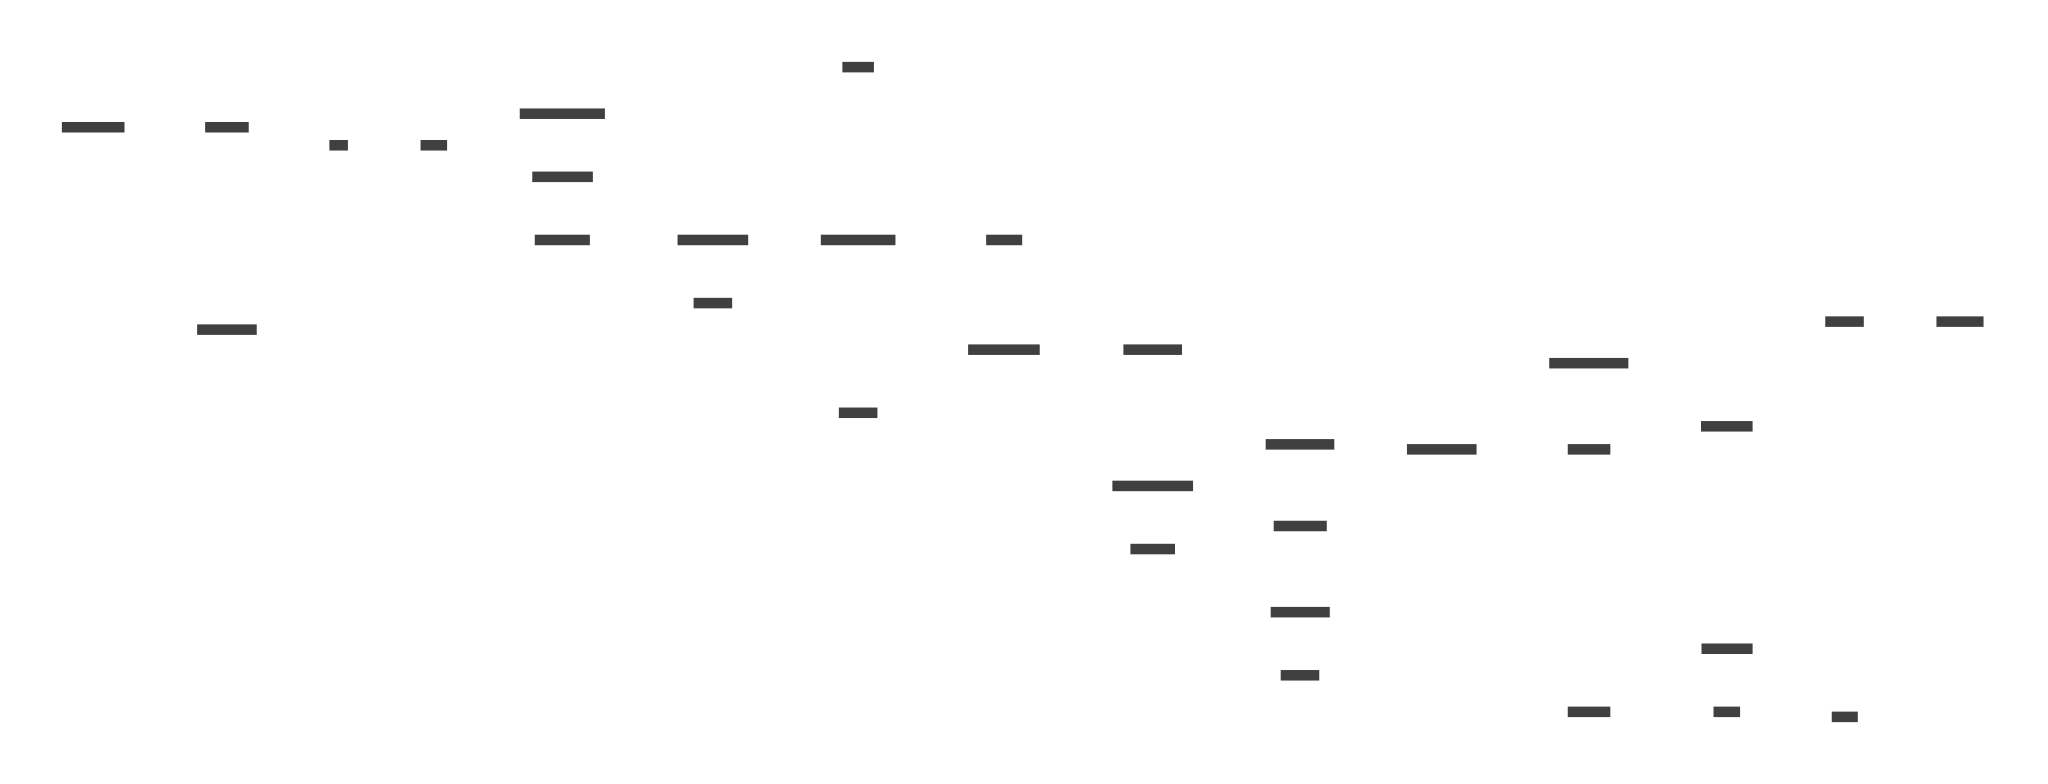

In [18]:
# if you generated the SVG in the previous step you can show it here
from IPython.display import SVG

SVG("uky_model.svg")